In [1]:
# Install liac-arff
!pip install liac-arff
!pip install butter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=7f7710d160a05a9891698c67f4f1f9b9646c85365b9c30bb8de7fab607d97bd5
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for butter: filename=butter-0.13.1-cp39-cp39-linux_x86_64.whl size=184728 sha256=ddaaa7f5cac912a7e450da7933134d912caae9e93d7e34940b4bc0cda5631abb
  Stored in directory: /root/.cache/pip/wheels/50/09/06/defec606641141d8c77616ad476e218a64a99d0d8fbb69678c
Successfully built butter


In [40]:
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from sklearn.preprocessing import LabelEncoder

In [50]:
# Membaca file ARFF pada wisdm-dataset\arff_files\phone\gyro
with open('data_1600_gyro_phone.arff') as file:
    data = arff.load(file)

In [51]:
atr = data['attributes']
data_2 = data['data']
newAtr = []
for i in range(len(atr)):
  newAtr.append(atr[i][0])

In [52]:
df = pd.DataFrame(data_2, columns=newAtr)

In [7]:
df

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.0,0.480,0.520,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120584,0.119034,-0.428960,-0.016207,0.249268,-0.431510,-0.016170,0.251007,1.080990,1600
1,A,0.0,0.500,0.500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.136677,0.134921,-0.302632,-0.023411,0.231288,-0.303465,-0.023519,0.231075,1.116030,1600
2,A,0.0,0.485,0.515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129022,0.127364,-0.440482,-0.064347,0.234576,-0.441709,-0.063696,0.237180,1.119920,1600
3,A,0.0,0.475,0.525,0.0,0.0,0.0,0.0,0.0,0.0,...,0.132912,0.131204,-0.437835,-0.106093,0.160011,-0.437666,-0.106615,0.160493,1.073060,1600
4,A,0.0,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.140539,0.138733,-0.442345,-0.048199,0.191121,-0.442838,-0.048344,0.190805,0.973460,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,S,0.0,0.480,0.520,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.210775,-0.208067,-0.142147,-0.809427,0.211784,-0.142052,-0.809588,0.211216,0.168325,1600
317,S,0.0,0.530,0.470,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.147521,-0.145626,0.224663,-0.298117,0.257999,0.225147,-0.296433,0.258067,0.176746,1600
318,S,0.0,0.435,0.565,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.253238,-0.249984,-0.126590,-0.580228,0.305012,-0.144016,-0.578861,0.314339,0.152854,1600
319,S,0.0,0.435,0.565,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.311850,-0.307842,-0.573923,-0.677714,0.526732,-0.582120,-0.677625,0.532423,0.143740,1600


In [59]:
le = LabelEncoder()
le.fit(df['ACTIVITY'])
df['ACTIVITY'] = le.transform(df['ACTIVITY'])
df

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0,0.0,0.480,0.520,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122004,0.120584,0.119034,-0.428960,-0.016207,0.249268,-0.431510,-0.016170,0.251007,1.080990
1,0,0.0,0.500,0.500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.138287,0.136677,0.134921,-0.302632,-0.023411,0.231288,-0.303465,-0.023519,0.231075,1.116030
2,0,0.0,0.485,0.515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130542,0.129022,0.127364,-0.440482,-0.064347,0.234576,-0.441709,-0.063696,0.237180,1.119920
3,0,0.0,0.475,0.525,0.0,0.0,0.0,0.0,0.0,0.0,...,0.134478,0.132912,0.131204,-0.437835,-0.106093,0.160011,-0.437666,-0.106615,0.160493,1.073060
4,0,0.0,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142195,0.140539,0.138733,-0.442345,-0.048199,0.191121,-0.442838,-0.048344,0.190805,0.973460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,17,0.0,0.480,0.520,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.213258,-0.210775,-0.208067,-0.142147,-0.809427,0.211784,-0.142052,-0.809588,0.211216,0.168325
317,17,0.0,0.530,0.470,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.149259,-0.147521,-0.145626,0.224663,-0.298117,0.257999,0.225147,-0.296433,0.258067,0.176746
318,17,0.0,0.435,0.565,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.256221,-0.253238,-0.249984,-0.126590,-0.580228,0.305012,-0.144016,-0.578861,0.314339,0.152854
319,17,0.0,0.435,0.565,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.315523,-0.311850,-0.307842,-0.573923,-0.677714,0.526732,-0.582120,-0.677625,0.532423,0.143740


In [58]:
df = df.drop('class', axis=1)

In [75]:
def lowpass_filter(data, fs, cutoff):
    nyquist = 0.5 * fs
    cutoff_freq = cutoff / nyquist
    taps = firwin(numtaps=101, cutoff=cutoff_freq)
    filtered_data = lfilter(taps, 1.0, data)
    return filtered_data

df_5filtered = df.apply(lambda x: lowpass_filter(x, 100, 2), axis=0)

In [76]:
df_2filtered = df.apply(lambda x: lowpass_filter(x, 100, 5), axis=0)

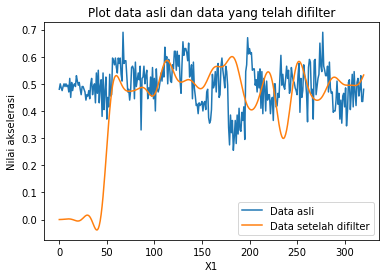

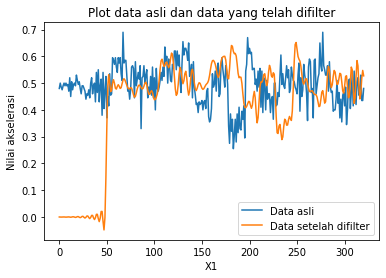

In [77]:
plt.plot(df['X1'], label='Data asli')
plt.plot(df_5filtered['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')

plt.show()

plt.plot(df['X1'], label='Data asli')
plt.plot(df_2filtered['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')

plt.show()

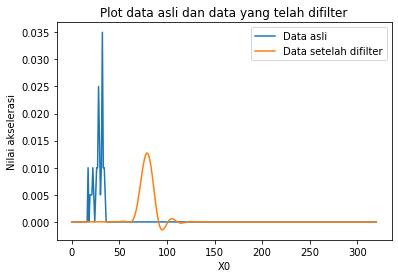

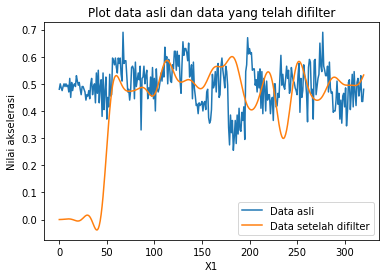

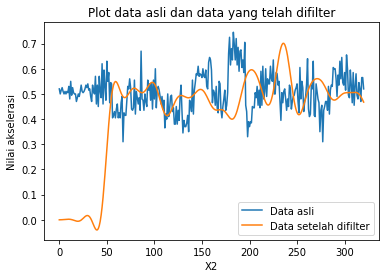

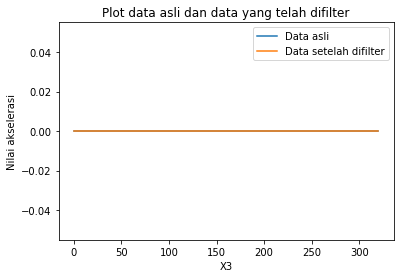

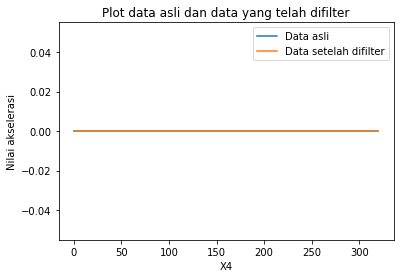

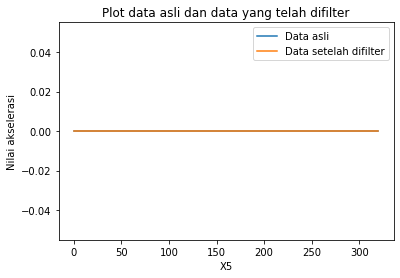

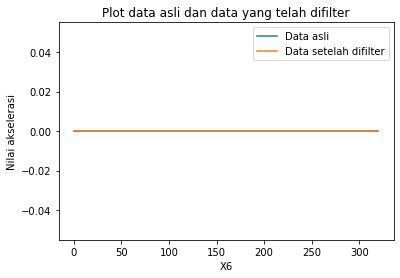

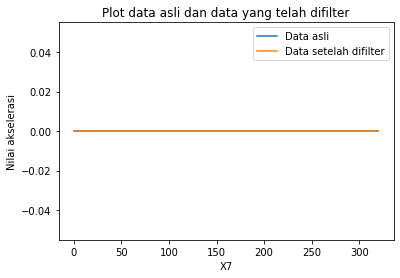

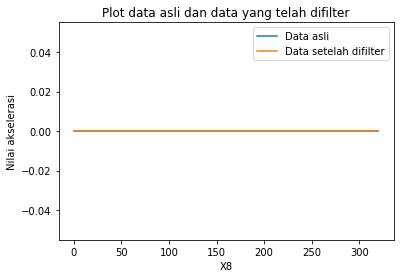

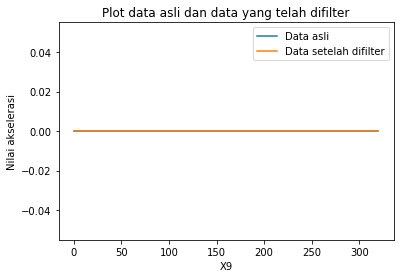

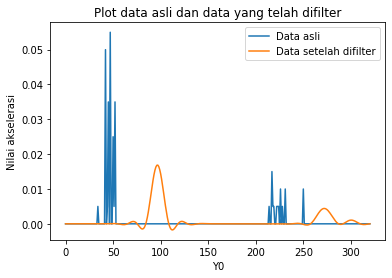

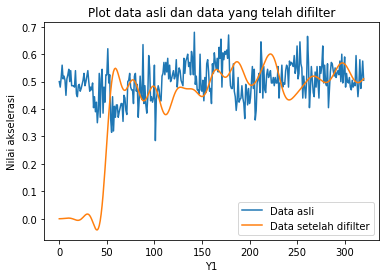

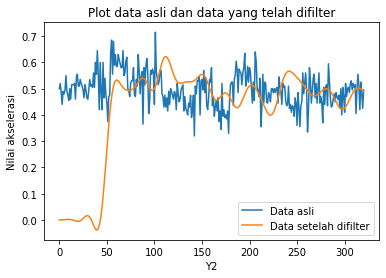

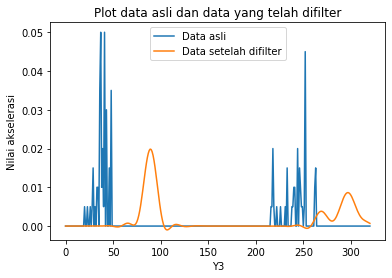

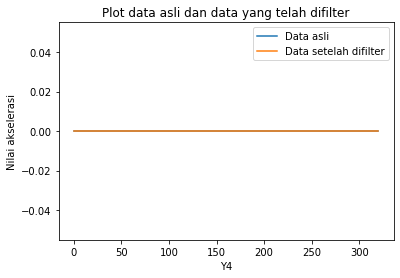

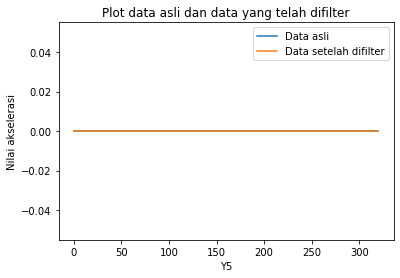

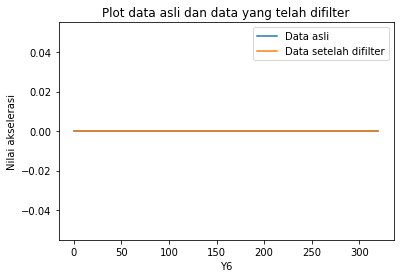

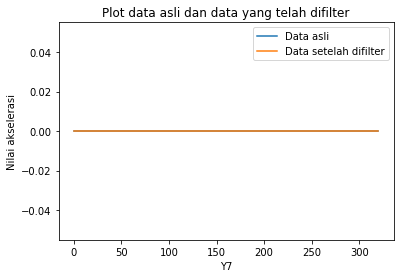

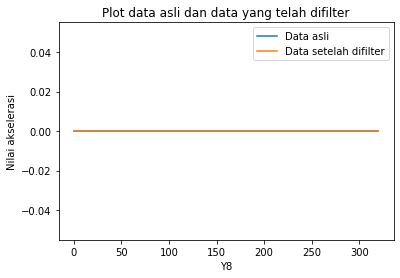

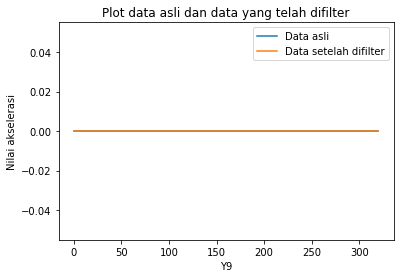

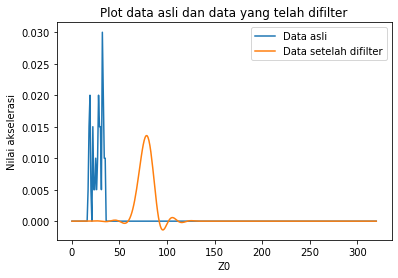

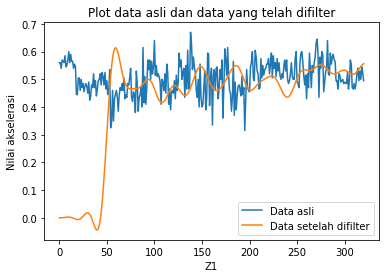

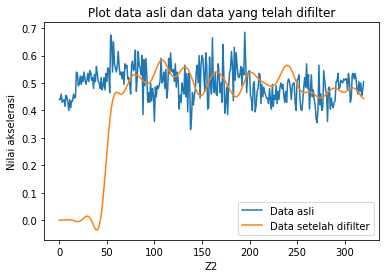

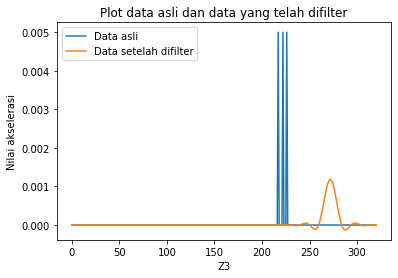

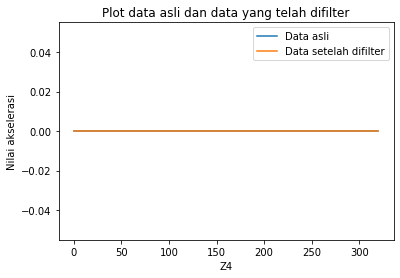

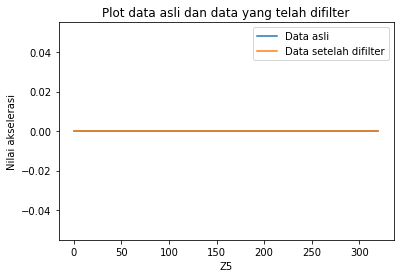

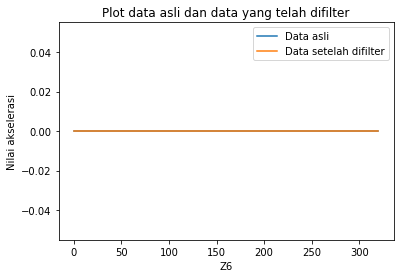

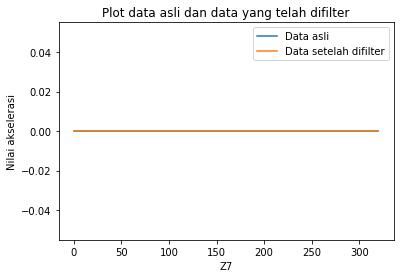

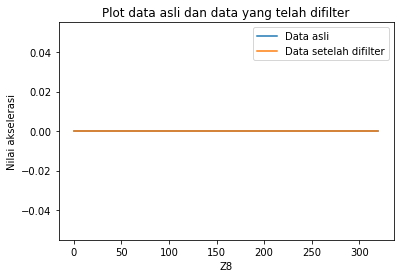

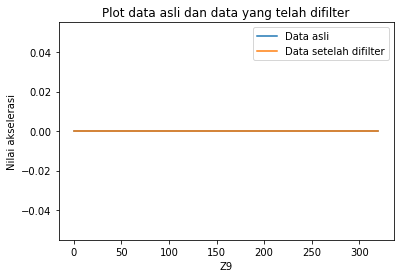

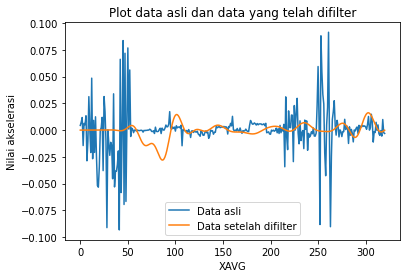

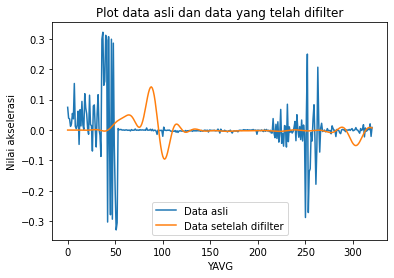

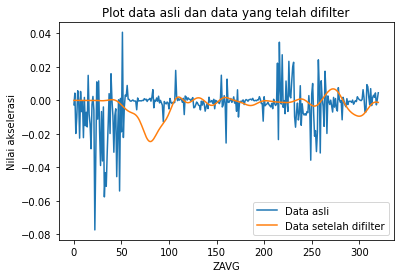

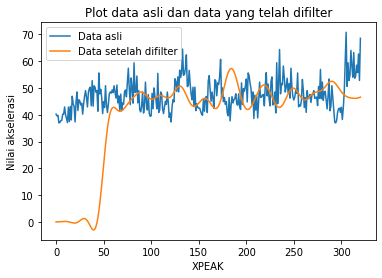

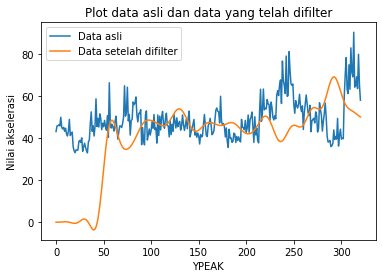

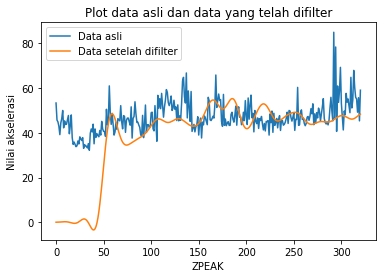

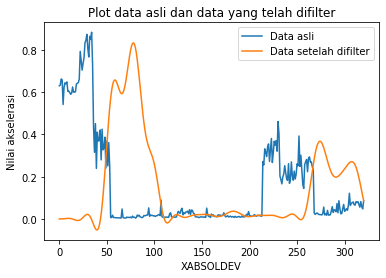

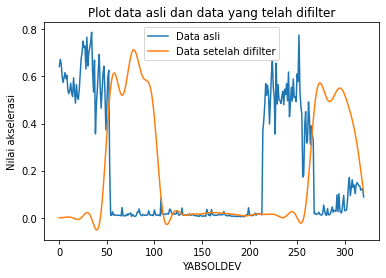

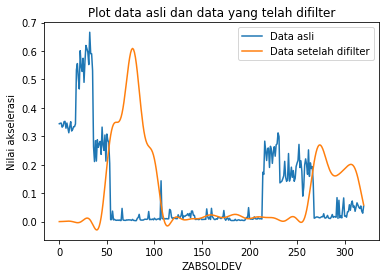

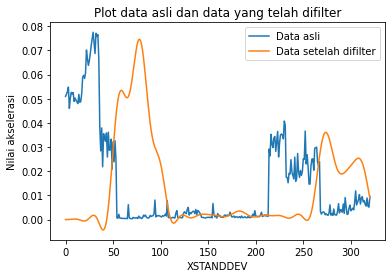

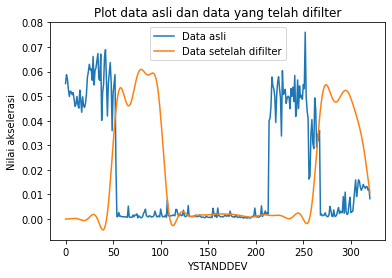

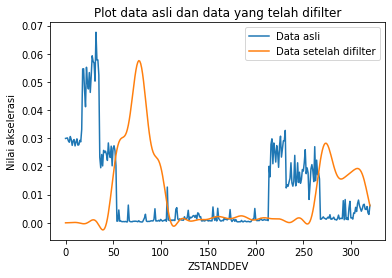

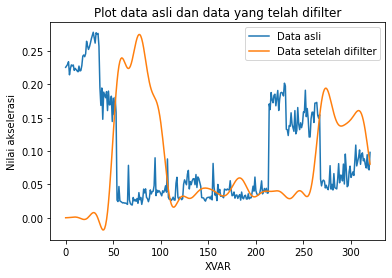

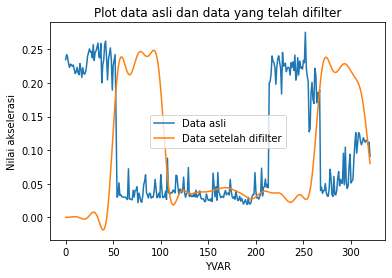

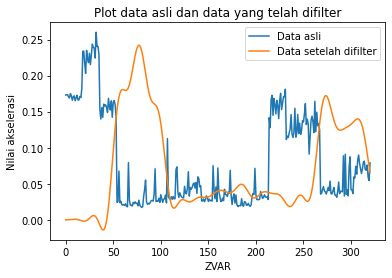

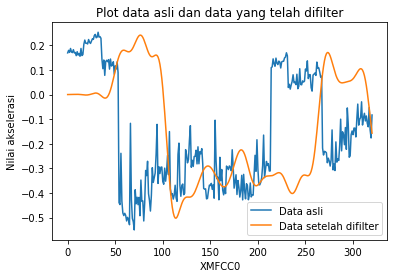

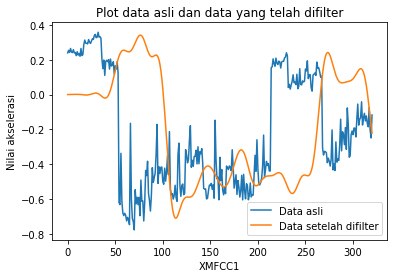

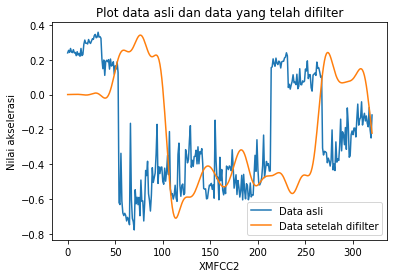

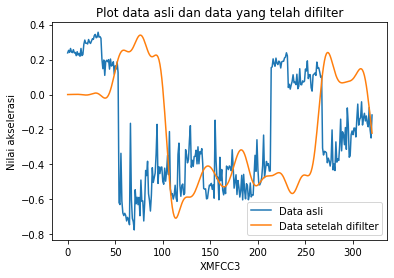

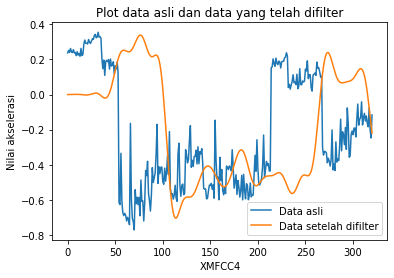

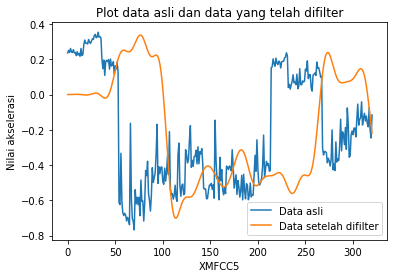

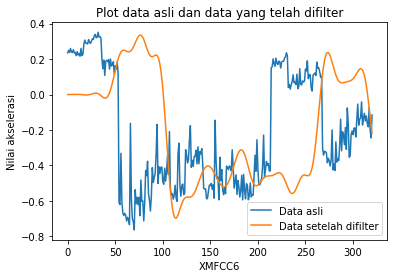

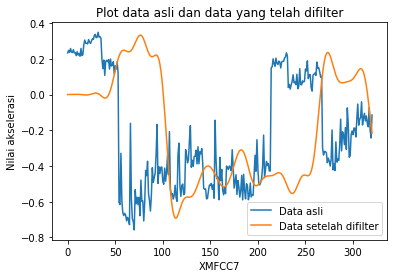

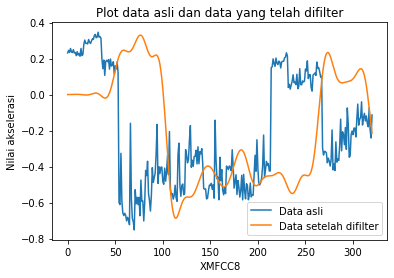

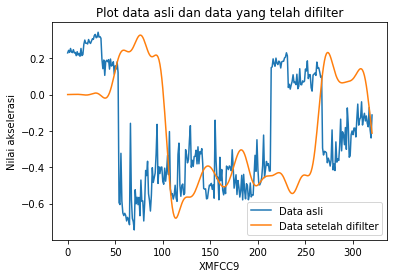

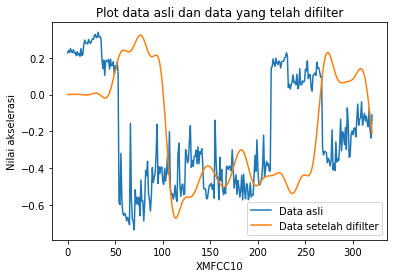

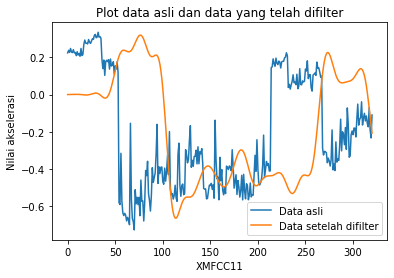

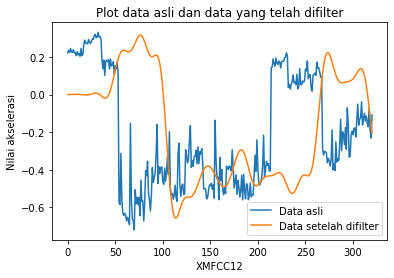

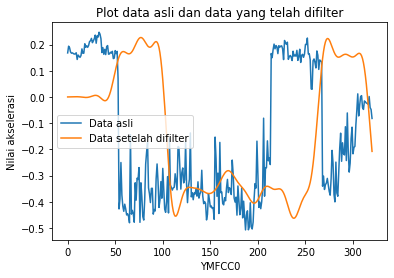

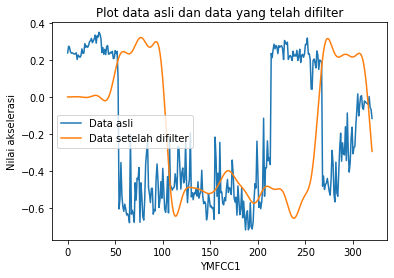

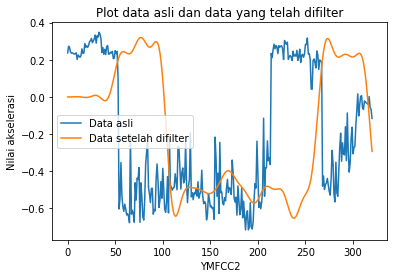

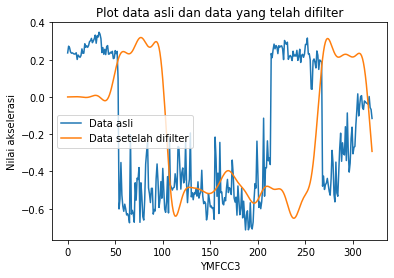

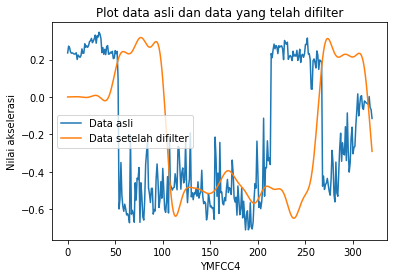

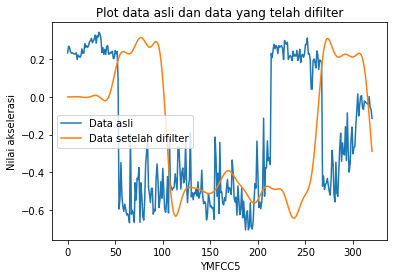

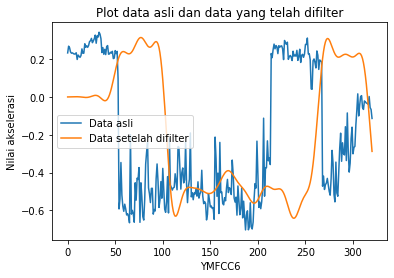

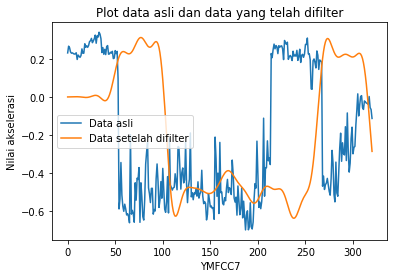

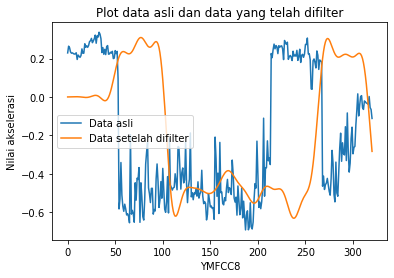

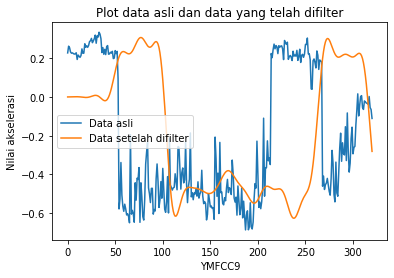

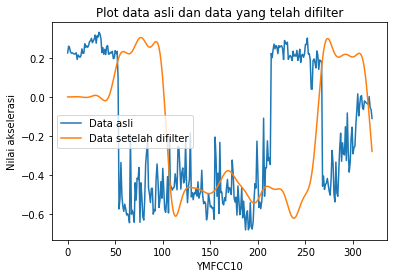

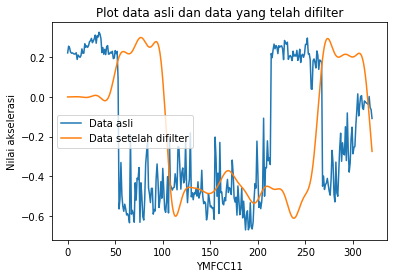

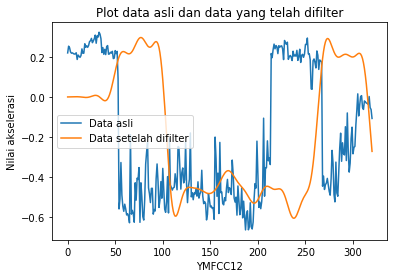

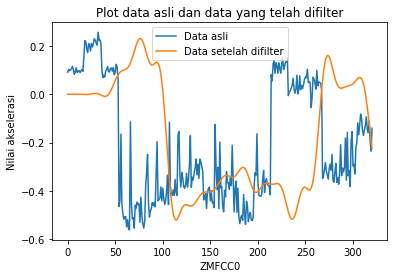

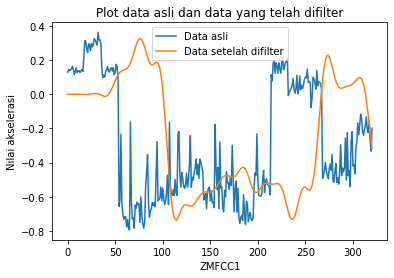

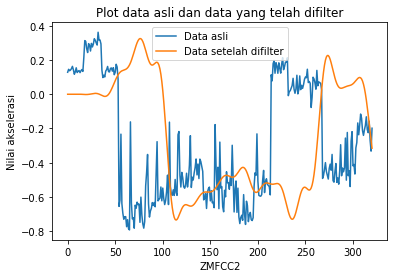

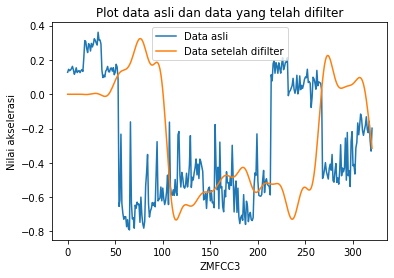

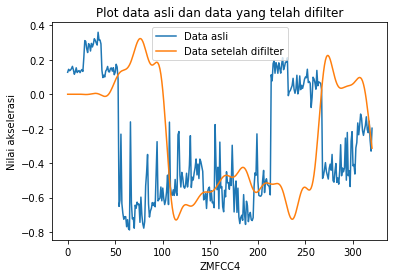

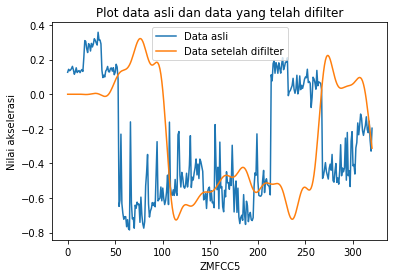

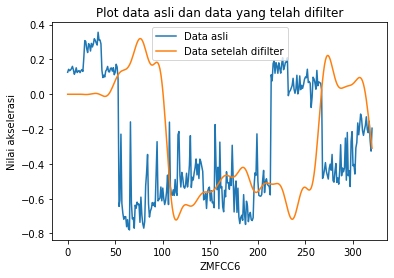

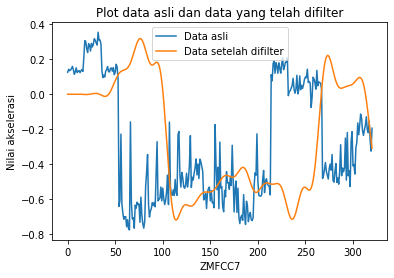

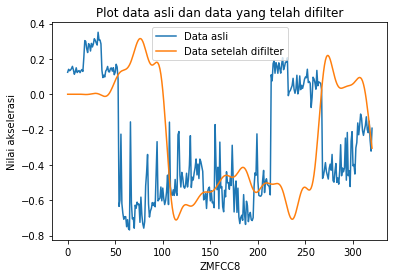

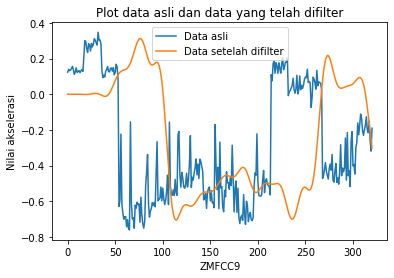

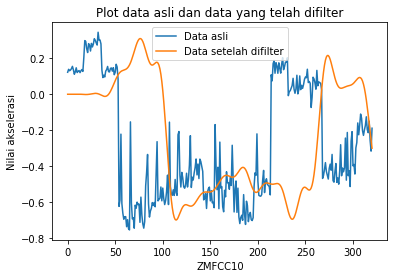

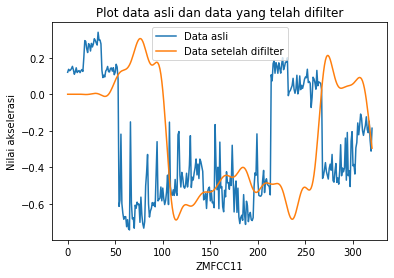

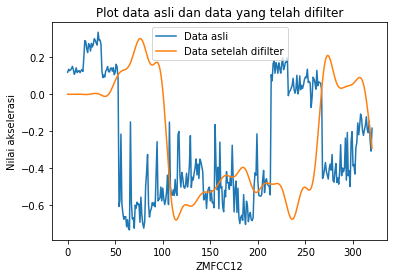

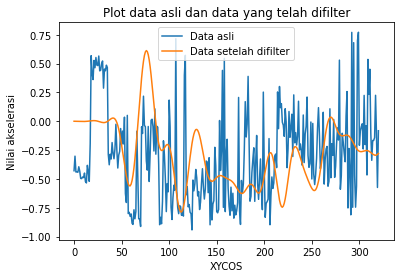

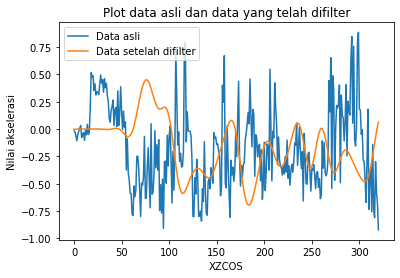

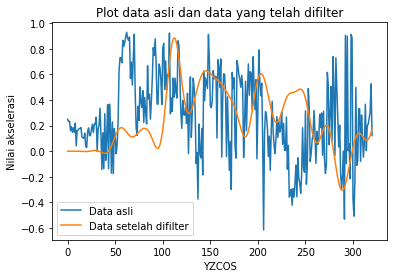

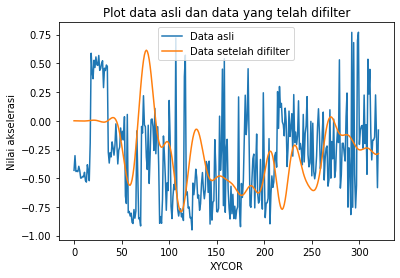

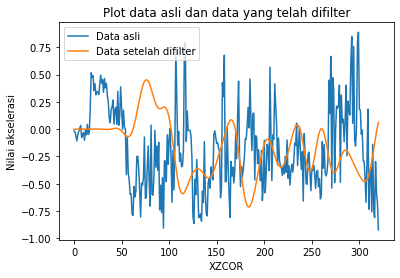

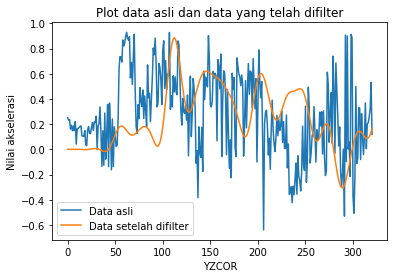

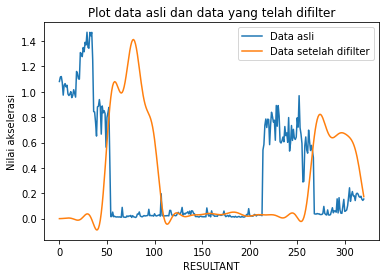

In [21]:
for i in df:
  if i != 'ACTIVITY':
    plt.plot(df[i], label='Data asli')
    plt.plot(df_filtered[i], label='Data setelah difilter')

    plt.legend()
    plt.title('Plot data asli dan data yang telah difilter')
    plt.xlabel(i)
    plt.ylabel('Nilai akselerasi')

    plt.show()